<a href="https://colab.research.google.com/github/JonaBaron/TensorFlow/blob/main/03_Computer_vison_%26_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convolution neural network and computer vision with TF

## Get the data

In [37]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2025-01-07 22:59:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.69.155, 142.250.69.59, 142.250.69.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.69.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip.1'

pizza_steak.zip.1   100%[===================>] 104.47M  13.6MB/s    in 7.7s    

2025-01-07 22:59:39 (13.5 MB/s) - 'pizza_steak.zip.1' saved [109540975/109540975]



## Inspect the data

In [38]:
!ls pizza_steak

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
test  train


In [39]:
!ls pizza_steak/train

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
pizza  steak


In [40]:
!ls pizza_steak/train/steak/

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775

In [41]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


##To visualize our images let's get class names

In [42]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [43]:
# Let's look at the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


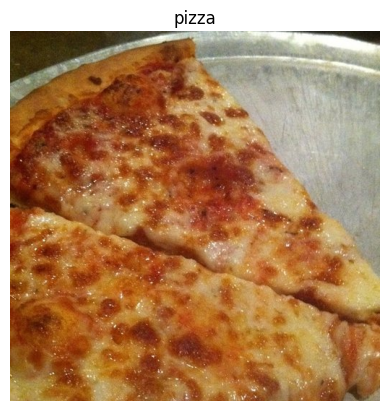

In [44]:
# View a random image from steak
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [45]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 58,  43,  20],
        [ 50,  35,  12],
        [ 46,  32,   6],
        ...,
        [ 25,  22,  13],
        [ 22,  19,  10],
        [ 20,  17,   8]],

       [[ 51,  36,  13],
        [ 47,  32,   9],
        [ 44,  30,   4],
        ...,
        [ 25,  22,  13],
        [ 25,  22,  13],
        [ 26,  23,  14]],

       [[ 49,  35,   9],
        [ 50,  36,  10],
        [ 49,  35,   9],
        ...,
        [ 23,  20,  11],
        [ 25,  22,  13],
        [ 27,  24,  15]],

       ...,

       [[173, 149,  79],
        [175, 151,  81],
        [177, 152,  86],
        ...,
        [152, 140, 116],
        [156, 144, 120],
        [151, 139, 115]],

       [[173, 149,  79],
        [177, 153,  83],
        [180, 155,  89],
        ...,
        [145, 133, 111],
        [149, 137, 115],
        [147, 135, 113]],

       [[180, 156,  86],
        [186, 162,  92],
        [191, 166, 100],
        ...,
        [135, 123, 10

In [46]:
# View the image shape
img.shape # return width, height, color chanel

(512, 512, 3)

In [47]:
# Get all the pixel values normalize
img/255

array([[[0.22745098, 0.16862745, 0.07843137],
        [0.19607843, 0.1372549 , 0.04705882],
        [0.18039216, 0.1254902 , 0.02352941],
        ...,
        [0.09803922, 0.08627451, 0.05098039],
        [0.08627451, 0.0745098 , 0.03921569],
        [0.07843137, 0.06666667, 0.03137255]],

       [[0.2       , 0.14117647, 0.05098039],
        [0.18431373, 0.1254902 , 0.03529412],
        [0.17254902, 0.11764706, 0.01568627],
        ...,
        [0.09803922, 0.08627451, 0.05098039],
        [0.09803922, 0.08627451, 0.05098039],
        [0.10196078, 0.09019608, 0.05490196]],

       [[0.19215686, 0.1372549 , 0.03529412],
        [0.19607843, 0.14117647, 0.03921569],
        [0.19215686, 0.1372549 , 0.03529412],
        ...,
        [0.09019608, 0.07843137, 0.04313725],
        [0.09803922, 0.08627451, 0.05098039],
        [0.10588235, 0.09411765, 0.05882353]],

       ...,

       [[0.67843137, 0.58431373, 0.30980392],
        [0.68627451, 0.59215686, 0.31764706],
        [0.69411765, 0

In [48]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Create image data generator
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (Tiny VGG)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - accuracy: 0.6395 - loss: 0.6338 - val_accuracy: 0.7820 - val_loss: 0.4555
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.7807 - loss: 0.4942 - val_accuracy: 0.8460 - val_loss: 0.3779
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.8135 - loss: 0.4493 - val_accuracy: 0.8480 - val_loss: 0.3612
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - accuracy: 0.8523 - loss: 0.3655 - val_accuracy: 0.8060 - val_loss: 0.4323
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.8398 - loss: 0.3861 - val_accuracy: 0.8420 - val_loss: 0.3719


## HELLO